<a href="https://colab.research.google.com/github/gonzalomoraMD/BasicSR/blob/master/Medicalai_Tutorial_1_Image_Classification_Pneumonia_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Medicalai Tutorial 1: Getting Started with Medicalai Library**

### High-level Tensorflow 2.0 wrapper library to speed up experiments from training to deployment.

[Youtube Video Tutorial](https://www.youtube.com/watch?v=V4nCX-kLACg)


---




## Install MedicalAI library from Pypi

In [ ]:
!pip install medicalai -q

     |████████████████████████████████| 51kB 4.3MB/s 
     |████████████████████████████████| 35.3MB 88kB/s 


In [ ]:
import medicalai as ai

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



### Download Sample Dataset

In [ ]:
datasetDWLD = ai.getFile('https://github.com/aibharata/covid19-dataset/archive/v1.0.zip')
datasetFolderPath = datasetDWLD+'/covid19-dataset-1.0/chest-xray-pnumonia-covid19/'
datasetFolderPath

dataset: 0.00B [00:05, ?B/s]


'/root/.easyai/dataset/v1/covid19-dataset-1.0/chest-xray-pnumonia-covid19/'

### Set Dataset Parameters and Use Dataset Preprocessor to Load Dataset

In [ ]:
IMG_HEIGHT = 64
IMG_WIDTH = 64
OUTPUT_CLASSES = 3

trainSet,testSet,labelNames =ai.datasetFromFolder(datasetFolderPath, targetDim = (IMG_WIDTH,IMG_WIDTH), normalize=True).load_dataset()

'test' Folder Present
'train' Folder Present
Reloading Dataset from Cache
'reload_data'  61.91 ms


In [ ]:
# Print Shapes of Dataset
trainSet.data.shape,trainSet.labels.shape

((240, 64, 64, 3), (240, 1))

In [ ]:
testSet.data.shape,testSet.labels.shape

((60, 64, 64, 3), (60, 1))

### Set Training HyperParameters and Select Prebuild AI Networks

In [ ]:
batch_size = 32
epochs = 10
learning_rate = 0.0001

RETRAIN_MODEL = True

MODEL_SAVE_NAME = 'medicalai_test_model_1'

#Select Inbuilt Networks to train the model
AI_NAME = 'tinyMedNet'

Available Networks:

*DenseNet121,
InceptionResNetV2,
InceptionV3,
MobileNet,
MobileNetV2,
NetworkInit,
VGG16,
Xception,
megaNet,
resNet101,
resNet101V2,
resNet152,
resNet152V2,
resNet50,
resNet50V2,
tinyMedNet,
tinyMedNet_v2,
tinyMedNet_v3*

## Initialize Train Engine

In [ ]:
trainer = ai.TRAIN_ENGINE()

[INFO]: Meta File Not Found - Not Initializing Preprocessor from Meta


In [ ]:
trainer.train_and_save_model(AI_NAME=AI_NAME,
                             MODEL_SAVE_NAME = MODEL_SAVE_NAME,
                             trainSet=trainSet, testSet=testSet,
                             OUTPUT_CLASSES=OUTPUT_CLASSES,
                             RETRAIN_MODEL= RETRAIN_MODEL,
                             BATCH_SIZE= batch_size,
                             EPOCHS= epochs,
                             LEARNING_RATE= learning_rate,
                             SAVE_BEST_MODEL = True,
                             showModel = True # Set this True if you want to see model summary
                             )




 	[INFO]: Using Model: medicalai_test_model_1.json 



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CNN1 (Conv2D)                (None, 60, 60, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 64)        0         
_________________________________________________________________
CNN2 (Conv2D)                (None, 25, 25, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
CNN3 (Conv2D)                (None, 8, 8, 64)          102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
________________________________________________________________

In [ ]:
# Plot Training Metrics
trainer.plot_train_acc_loss()

## Generate a comprehensive Model Evaluation report.
#### Generate a PDF with model sensitivity, specificity, accuracy, confidence intervals, ROC Curve Plot, Precision Recall Curve Plot, and Confusion Matrix Plot for each class. This function can be used when evaluating a model with Test or Validation Data Set.

[INFO]: Report Generated at Path:
	 /content/medicalai_test_model_1_report.pdf


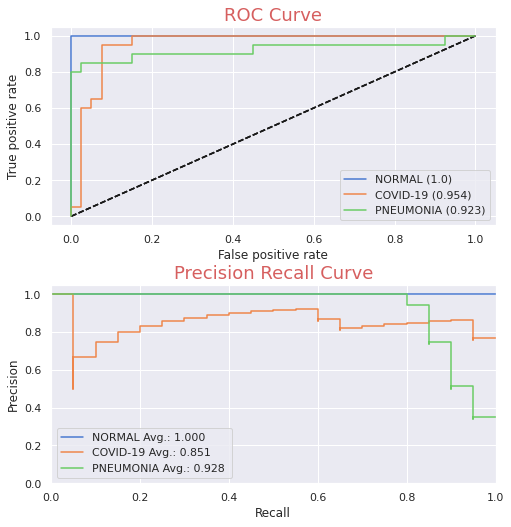

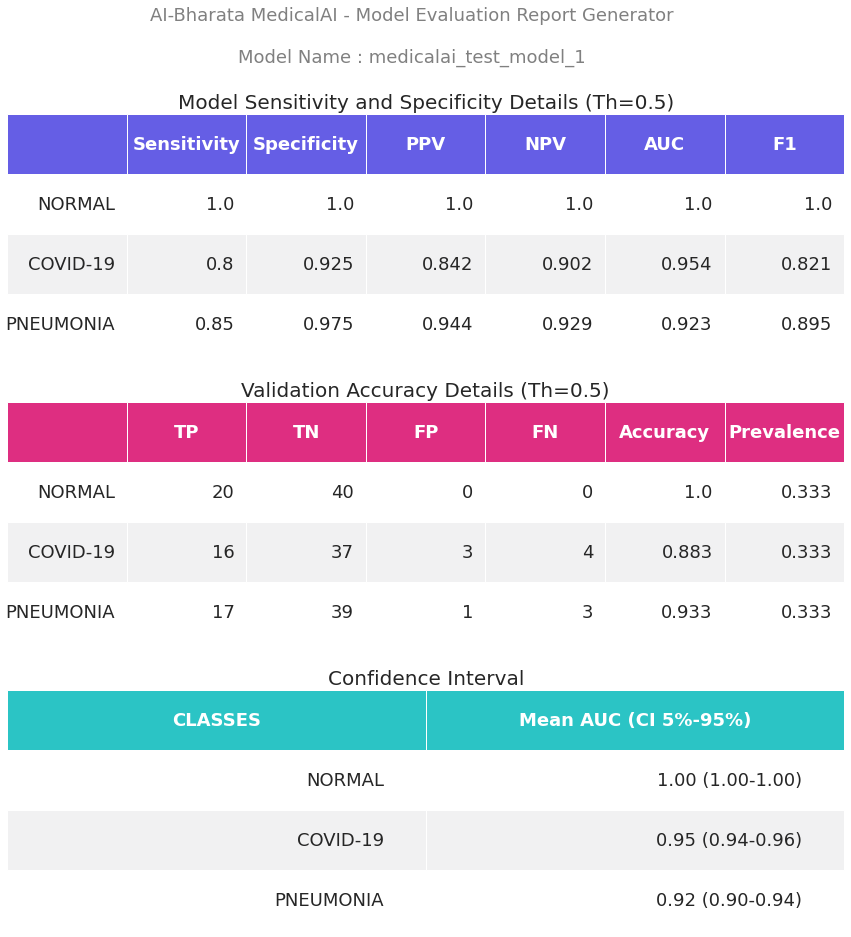

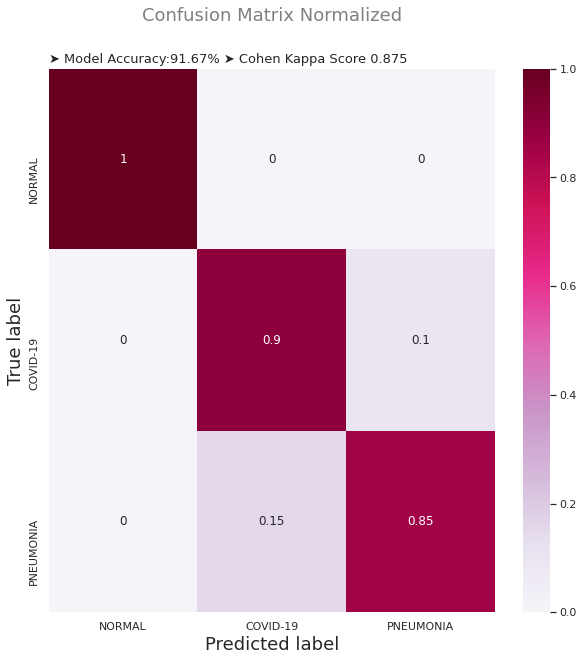

In [ ]:
# Generate a comprehensive PDF report with model sensitivity, specificity, accuracy, confidence intervals,
# ROC Curve Plot, Precision Recall Curve Plot, and Confusion Matrix Plot for each class.
# This function can be used when evaluating a model with Test or Validation Data Set.

trainer.generate_evaluation_report()

## Explain the Model on a sample (Explainable AI)

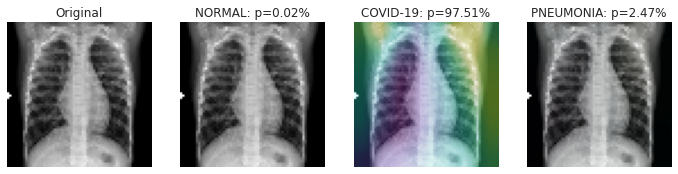

In [ ]:
trainer.explain(testSet.data[0:1], layer_to_explain='CNN3',classNames=labelNames)

## **INFERENCE ENGINE** FOR PREDICTION AND PRODUCTION

#### Perform inference/prediction on trained model with just 2-3 lines of code

In [ ]:
# Performing prediction on Trained Model
# Initialize Inference Engine
infEngine = ai.INFERENCE_ENGINE(MODEL_SAVE_NAME)

In [ ]:
# Predict on sample from test dataset
preds = infEngine.predict(testSet.data[0:1])

# Docode Predictions
infEngine.decode_predictions(preds)

[[(1, 'COVID-19', 97.51), (2, 'PNEUMONIA', 2.47), (3, 'NORMAL', 0.02)]]

In [ ]:
# Download image from web and perform prediction
testImg = ai.getFile('https://prod-images-static.radiopaedia.org/images/25074708/3338ec853d6ee91b9dc0e00ec36217_jumbo.jpeg')
preds = infEngine.predict(testImg)
infEngine.decode_predictions(preds)

[[(1, 'COVID-19', 81.24), (2, 'PNEUMONIA', 15.03), (3, 'NORMAL', 3.73)]]

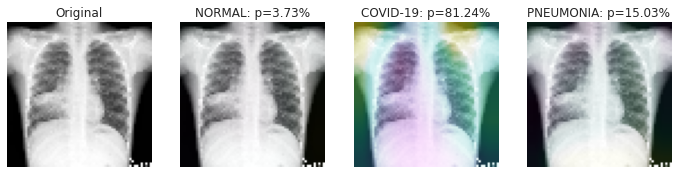

In [ ]:
processedInput = infEngine.preProcessor.processImage(testImg)
infEngine.explain(processedInput, layer_to_explain='CNN3',classNames=labelNames)